In [3]:
import matplotlib.pyplot as plt; plt.rcParams['figure.dpi'] = 250
import numpy as np
import torch 
import h5py
import sys
model_path = '...\\Models architecture'
sys.path.append(model_path)

from cvae import VariationalAutoencoder

In [3]:
nc, nf, z_dim = 1, 64, 32
device = 'cuda'
vae = VariationalAutoencoder(nc, nf, z_dim).to(device)

In [1]:
folder_galaxy_w_redshift= '...\\weights + losses\\galaxy_w_redshift\\cvae\\'
folder_galaxy_denoised_ = '...\\weights + losses\\galaxy_denoised\\'
file_loss = 'z32_beta0.1_loss.pt'
file_weights = 'z32_beta0.1_weights.pt'

In [4]:
train_loss, val_loss, mse, kl, hyperparameters = torch.load(folder_galaxy_w_redshift + file_loss)

In [6]:
batch_size = hyperparameters["batch size"]
num_epochs = hyperparameters["batch size"]
beta = hyperparameters["beta"]
lr = hyperparameters["learning rate"]

In [7]:
train_iterations_per_epoch = len(train_loss)//num_epochs
val_iterations_per_epoch = len(val_loss)//num_epochs
epochs = np.linspace(1, num_epochs, num_epochs)

train_loss_epoch = []
val_loss_epoch = []

for i, j in enumerate(epochs):
    j = int(j)
    avg_train_loss = train_loss[i*train_iterations_per_epoch: j*train_iterations_per_epoch].mean() 
    train_loss_epoch.append(avg_train_loss)
    
    avg_val_loss = val_loss[i*val_iterations_per_epoch : j*val_iterations_per_epoch].mean()
    val_loss_epoch.append(avg_val_loss)



Text(0.5, 1.0, 'Training for 200 epochs, $\\beta$=0.1, learning rate = 0.001. zdim = 32')

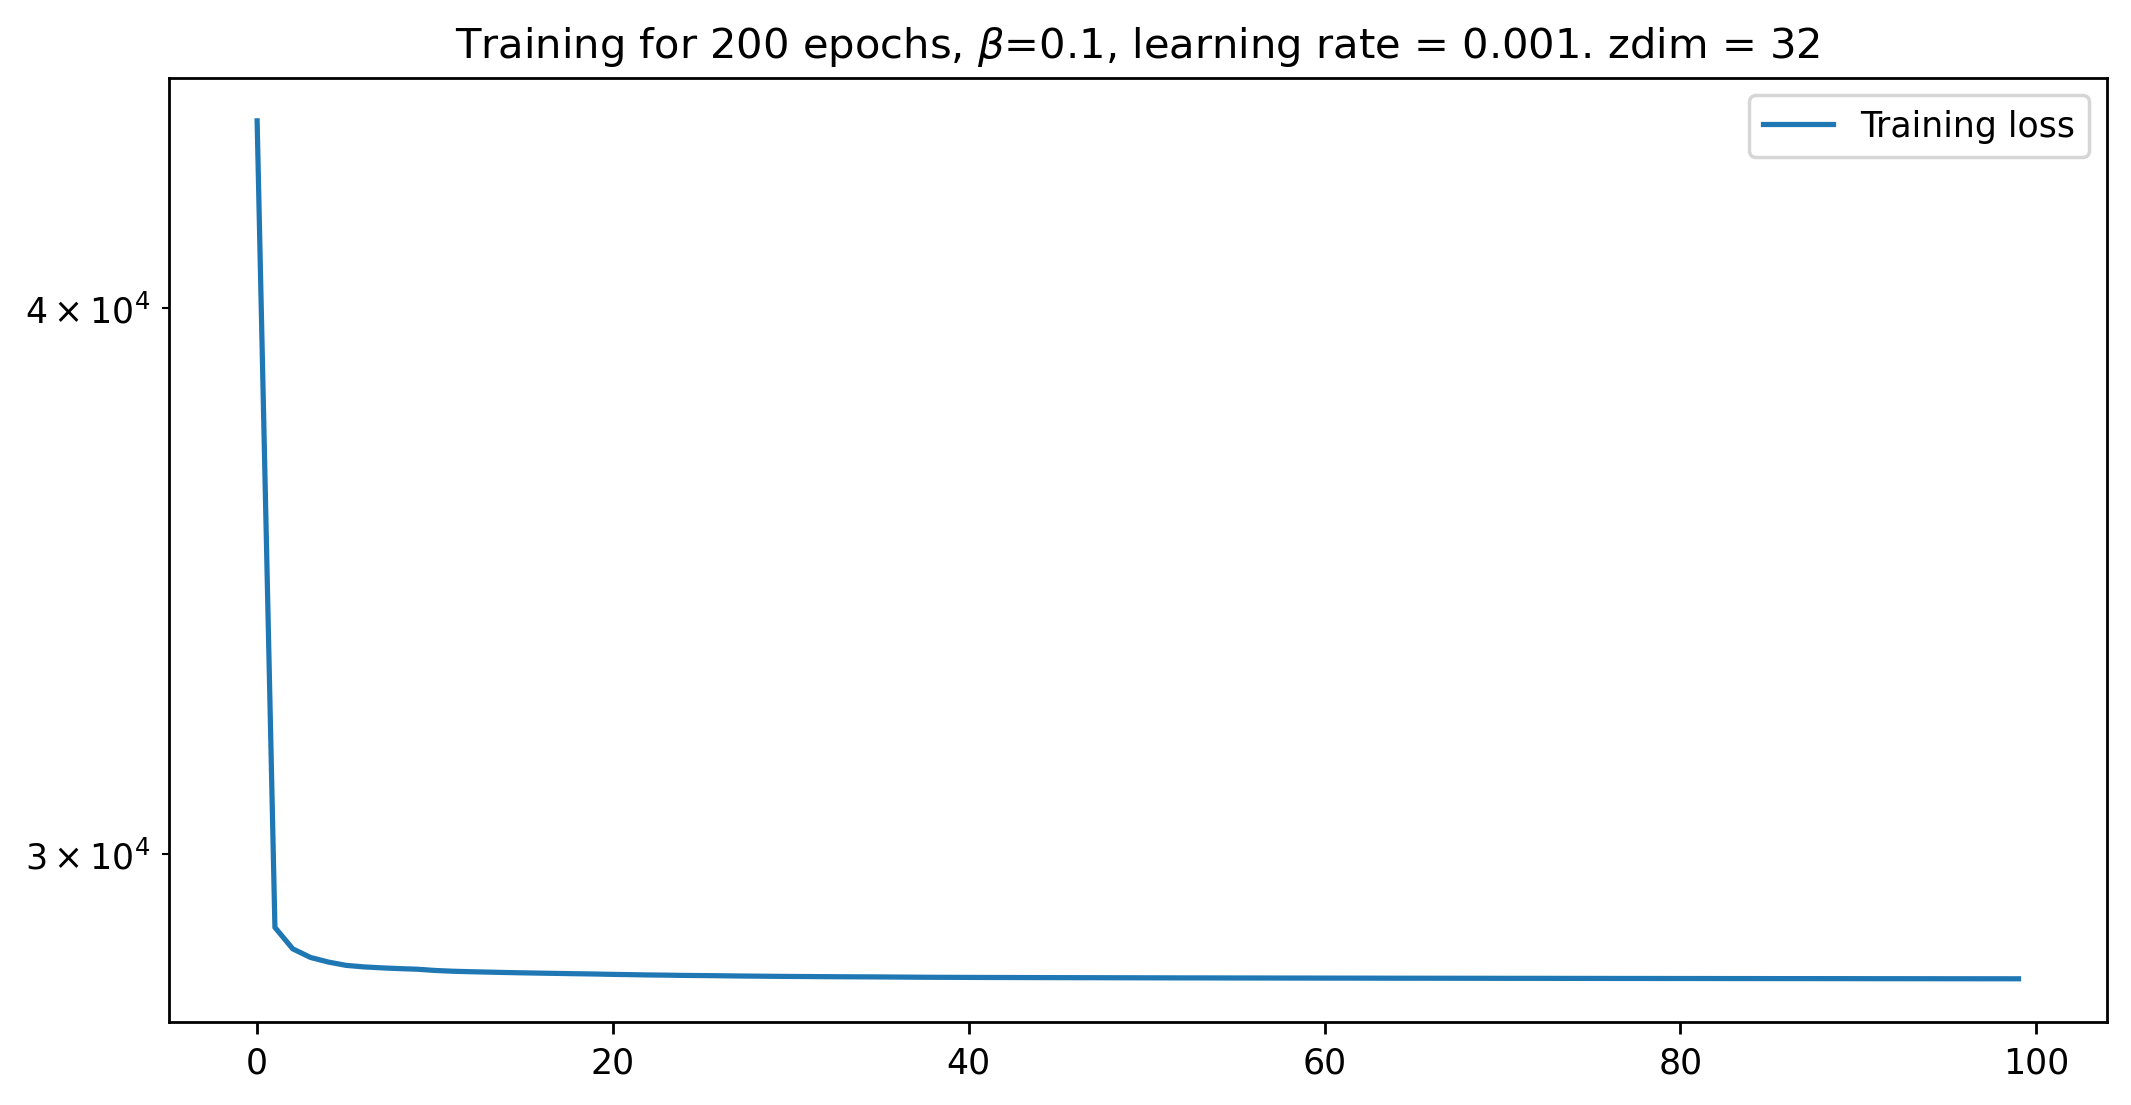

In [8]:
figure = plt.figure(figsize=(10, 5))
plt.plot(train_loss_epoch, label = 'Training loss')
plt.plot(val_loss_epoch, label = 'Validation loss')
plt.yscale('log')
plt.legend()
plt.title(r'Training for 200 epochs, $\beta$'+f'={beta}, learning rate = {lr}, zdim = {z_dim}')